<a href="https://colab.research.google.com/github/OlayinkaPeter/Olayinka_Oluwafemi_CD_Challenge/blob/master/Credit_Risk_Scoring_Challenge_%E2%80%94_Olayinka_CreditDirect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Credit Risk Scoring Challenge | Logistic Regression | GermanCredit — CreditDirect
#### Copyright 2023 Olayinka Peter Oluwafemi.

---



---


The steps in this notebook are as follows:


1.   Install & import necessary libraries.
2.   Cleaning our data
3.   One-hot Encoding for categorical data
4.   Splitting into Training Data and Testing Data
  *   Split features from labels
5.   Normalization
6.   Building the model: Logistic Regression with Keras
7.   Train the model
8.   Evaluate the model  
9.   Run predictions on validation data  
10.   Deployment




<br>

---



---


## First, let us install and import necessary libraries

In [1]:
# Use seaborn for pairplot
!pip install seaborn
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# machine learning libraries & helpers
import tensorflow as tf
from tensorflow import keras

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-u0hze_0d
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-u0hze_0d
  Resolved https://github.com/tensorflow/docs to commit 16b9f2ae045d728d2133eb61439ff2d5c9817211
  Preparing metadata (setup.py) ... done
2.12.0


In [2]:
dataset = pd.read_csv('GermanCredit.csv')
dataset

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,...,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,...,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,2,NaN,12,critical,education,2096,24.0,5 years,2,single,...,49,none,own,1,0,2,NaN,yes,unskilled resident,male
3,3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,...,45,none,for free,1,0,2,NaN,yes,skilled employee,male
4,4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,...,53,none,for free,2,1,2,NaN,yes,skilled employee,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,12,repaid,furniture,1736,48.0,4 years,3,NaN,...,31,none,own,1,0,1,NaN,yes,unskilled resident,female
996,996,-30.0,30,repaid,car (used),3857,20.0,3 years,4,divorced,...,40,none,own,1,0,1,2.340004e+09,yes,mangement self-employed,male
997,997,NaN,12,repaid,radio/tv,804,44.0,13 years,4,single,...,38,none,own,1,0,1,NaN,yes,skilled employee,male
998,998,-18.0,45,repaid,radio/tv,1845,31.0,2 years,4,single,...,23,none,for free,1,1,1,2.342257e+09,yes,skilled employee,male


In [3]:
dataset.columns

Index(['Unnamed: 0', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount', 'savings_balance',
       'employment_length', 'installment_rate', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'age',
       'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'gender'],
      dtype='object')

# Cleaning our data

The dataset contains a number of columns we do not need as well as a lot of unknown values.


In [4]:
dataset = dataset.drop(columns=['Unnamed: 0', 'purpose', 'telephone'])
dataset.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender
0,-43.0,6,critical,1169,NaN,13 years,4,single,none,6 years,real estate,67,none,own,2,0,1,yes,skilled employee,male
1,75.0,48,repaid,5951,89.0,2 years,2,NaN,none,5 months,real estate,22,none,own,1,1,1,yes,skilled employee,female
2,NaN,12,critical,2096,24.0,5 years,2,single,none,4 years,real estate,49,none,own,1,0,2,yes,unskilled resident,male
3,-32.0,42,repaid,7882,9.0,5 years,2,single,guarantor,13 years,building society savings,45,none,for free,1,0,2,yes,skilled employee,male
4,-23.0,24,delayed,4870,43.0,3 years,3,single,none,13 years,unknown/none,53,none,for free,2,1,2,yes,skilled employee,male


In [5]:
dataset.isna().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
amount                    0
savings_balance         183
employment_length        62
installment_rate          0
personal_status         310
other_debtors             0
residence_history       130
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
foreign_worker            0
job                       0
gender                    0
dtype: int64

### Some rows are more important than others, and so, we cannot afford to replace them.

`checking_balance` and `savings_balance` for instance, have empty rows which we will eventually have to drop.


However, other columns have empty rows than can be replaced. We will go ahead to replace empty values with their most occuring value (for text values) or the median (for numerical values)

In [6]:
# Column: personal_status
# Replace NaN with "single"
dataset['personal_status'] = dataset['personal_status'].fillna("single")

In [7]:
# Create function to convert years to months

def convert_years_to_months(input):
  try:
    if 'months' in input:
      input = input.replace(' months', '')
    elif 'years' in input:
      input = input.replace(' years', '')
      input = int(input) * 12
    return int(input)
  except BaseException:
    pass


dataset['residence_history'] = pd.Series([convert_years_to_months(val) for val in dataset['residence_history']], index = dataset.index)
dataset['employment_length'] = pd.Series([convert_years_to_months(val) for val in dataset['employment_length']], index = dataset.index)



In [8]:
# Column: residence_history and employment_length
# Replace NaN with median value

dataset['residence_history'] = dataset['residence_history'].fillna(dataset['residence_history'].median())
dataset['employment_length'] = dataset['employment_length'].fillna(dataset['employment_length'].median())

In [9]:
dataset.isna().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
amount                    0
savings_balance         183
employment_length         0
installment_rate          0
personal_status           0
other_debtors             0
residence_history         0
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
foreign_worker            0
job                       0
gender                    0
dtype: int64

####Now we're left with `checking_balance` and `savings_balance` still having NaN rows.

####Let us drop these rows as we do not want to "guess" values to replace with. bold text

In [10]:
dataset = dataset.dropna()

dataset = dataset.reset_index(drop=True)
dataset

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender
0,75.0,48,repaid,5951,89.0,24.0,2,single,none,5.0,real estate,22,none,own,1,1,1,yes,skilled employee,female
1,-32.0,42,repaid,7882,9.0,60.0,2,single,guarantor,156.0,building society savings,45,none,for free,1,0,2,yes,skilled employee,male
2,-23.0,24,delayed,4870,43.0,36.0,3,single,none,156.0,unknown/none,53,none,for free,2,1,2,yes,skilled employee,male
3,169.0,36,repaid,6948,57.0,24.0,2,single,none,3.0,other,35,none,rent,1,0,1,yes,mangement self-employed,male
4,13.0,30,critical,5234,52.0,36.0,4,married,none,10.0,other,28,none,own,2,1,1,yes,mangement self-employed,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,97.0,24,critical,1743,40.0,156.0,4,single,none,4.0,building society savings,48,none,own,2,0,1,yes,unskilled resident,male
518,-18.0,36,repaid,3959,75.0,36.0,4,single,none,36.0,building society savings,30,none,own,1,0,1,yes,mangement self-employed,male
519,-30.0,30,repaid,3857,20.0,36.0,4,divorced,none,60.0,building society savings,40,none,own,1,0,1,yes,mangement self-employed,male
520,-18.0,45,repaid,1845,31.0,24.0,4,single,none,96.0,unknown/none,23,none,for free,1,1,1,yes,skilled employee,male


## One-hot Encoding for categorical data

One-hot encoding is a technique used to represent categorical data in a way that can be used by machine learning algorithms. It involves converting each category value into a binary vector, where each vector has a length equal to the number of categories. For example, if there are three categories (A, B, and C), then each category value would be represented by a vector with three elements, where one element would be 1 and the other two elements would be 0.

One-hot encoding is useful because it allows machine learning algorithms to treat categorical data as numerical data. This can be important for algorithms that require numerical input, such as linear regression and logistic regression.


### We have a total of 9 columns that need to be transformed into categorical data for the purpose of our credit risk model

In [11]:
# Column: credit_history

print(dataset['credit_history'].unique())
dataset['credit_history'] = pd.Categorical(dataset['credit_history'])
credit_history_df = pd.get_dummies(dataset['credit_history'], prefix = 'credit_history')

credit_history_df.rename(columns={'credit_history_fully repaid': 'credit_history_fully_repaid',
                                  'credit_history_fully repaid this bank': 'credit_history_fully_repaid_bank'
                                  }, inplace=True)

credit_history_df.head()

['repaid' 'delayed' 'critical' 'fully repaid this bank' 'fully repaid']


,credit_history_critical,credit_history_delayed,credit_history_fully_repaid,credit_history_fully_repaid_bank,credit_history_repaid
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [12]:
# Column: personal_status

print(dataset['personal_status'].unique())
personal_status_df = pd.get_dummies(dataset['personal_status'], prefix = 'personal_status')

personal_status_df.head()

['single' 'married' 'divorced']


,personal_status_divorced,personal_status_married,personal_status_single
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [13]:
# Column: other_debtors

print(dataset['other_debtors'].unique())
other_debtors_df = pd.get_dummies(dataset['other_debtors'], prefix = 'other_debtors')
other_debtors_df.rename(columns={'other_debtors_co-applicant': 'other_debtors_coapplicant'}, inplace=True)

other_debtors_df.head()

['none' 'guarantor' 'co-applicant']


,other_debtors_coapplicant,other_debtors_guarantor,other_debtors_none
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
# Column: property

print(dataset['property'].unique())
property_df = pd.get_dummies(dataset['property'], prefix = 'property')
property_df.rename(columns={'property_building society savings': 'property_building_society_savings',
                            'property_real estate': 'property_real_estate',
                            'property_unknown/none': 'property_none'}, inplace=True)

property_df.head()

['real estate' 'building society savings' 'unknown/none' 'other']


,property_building_society_savings,property_other,property_real_estate,property_none
0,0,0,1,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [15]:
# Column: installment_plan

print(dataset['installment_plan'].unique())
installment_plan_df = pd.get_dummies(dataset['installment_plan'], prefix = 'installment_plan')

installment_plan_df.head()

['none' 'bank' 'stores']


,installment_plan_bank,installment_plan_none,installment_plan_stores
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [16]:
# Column: housing

print(dataset['housing'].unique())
housing_df = pd.get_dummies(dataset['housing'], prefix = 'housing')
housing_df.rename(columns={'housing_for free': 'housing_for_free'}, inplace=True)

housing_df.head()

['own' 'for free' 'rent']


,housing_for_free,housing_own,housing_rent
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [17]:
# Column: foreign_worker

print(dataset['foreign_worker'].unique())
foreign_worker_df = pd.get_dummies(dataset['foreign_worker'], prefix = 'foreign_worker')

foreign_worker_df.head()

['yes' 'no']


,foreign_worker_no,foreign_worker_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
# Column: job

print(dataset['job'].unique())
job_df = pd.get_dummies(dataset['job'], prefix = 'job')
job_df.rename(columns={'job_skilled employee': 'job_skilled_employee',
                       'job_mangement self-employed': 'job_mangement_self_employed',
                       'job_unskilled resident': 'job_unskilled_resident',
                       'job_unemployed non-resident': 'job_unemployed_non_resident'}, inplace=True)

job_df.head()

['skilled employee' 'mangement self-employed' 'unskilled resident'
 'unemployed non-resident']


,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


In [19]:
# Column: gender

print(dataset['gender'].unique())
gender_df = pd.get_dummies(dataset['gender'], prefix = 'gender')

gender_df.head()

['female' 'male']


,gender_female,gender_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
dataset = pd.concat([dataset, credit_history_df, personal_status_df, other_debtors_df, property_df,
                     installment_plan_df, housing_df, foreign_worker_df, job_df, gender_df], axis=1)
dataset.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,...,housing_own,housing_rent,foreign_worker_no,foreign_worker_yes,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male
0,75.0,48,repaid,5951,89.0,24.0,2,single,none,5.0,...,1,0,0,1,0,1,0,0,1,0
1,-32.0,42,repaid,7882,9.0,60.0,2,single,guarantor,156.0,...,0,0,0,1,0,1,0,0,0,1
2,-23.0,24,delayed,4870,43.0,36.0,3,single,none,156.0,...,0,0,0,1,0,1,0,0,0,1
3,169.0,36,repaid,6948,57.0,24.0,2,single,none,3.0,...,0,1,0,1,1,0,0,0,0,1
4,13.0,30,critical,5234,52.0,36.0,4,married,none,10.0,...,1,0,0,1,1,0,0,0,0,1


In [21]:
dataset = dataset.drop(columns=['personal_status', 'other_debtors', 'housing',
                                'credit_history', 'property', 'installment_plan',
                                'foreign_worker', 'job', 'gender'])
dataset.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_length,installment_rate,residence_history,age,existing_credits,default,...,housing_own,housing_rent,foreign_worker_no,foreign_worker_yes,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male
0,75.0,48,5951,89.0,24.0,2,5.0,22,1,1,...,1,0,0,1,0,1,0,0,1,0
1,-32.0,42,7882,9.0,60.0,2,156.0,45,1,0,...,0,0,0,1,0,1,0,0,0,1
2,-23.0,24,4870,43.0,36.0,3,156.0,53,2,1,...,0,0,0,1,0,1,0,0,0,1
3,169.0,36,6948,57.0,24.0,2,3.0,35,1,0,...,0,1,0,1,1,0,0,0,0,1
4,13.0,30,5234,52.0,36.0,4,10.0,28,2,1,...,1,0,0,1,1,0,0,0,0,1


####Now we have a total of 40 columns and 522 rows

# Splitting into Training Data and Testing Data

I split the dataset into a training set and a test set.

And use the test set in the final evaluation of the model.

In [22]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspecting the data

Using sns, I try to have a quick look at the joint distribution of a few pairs of columns from the training set.

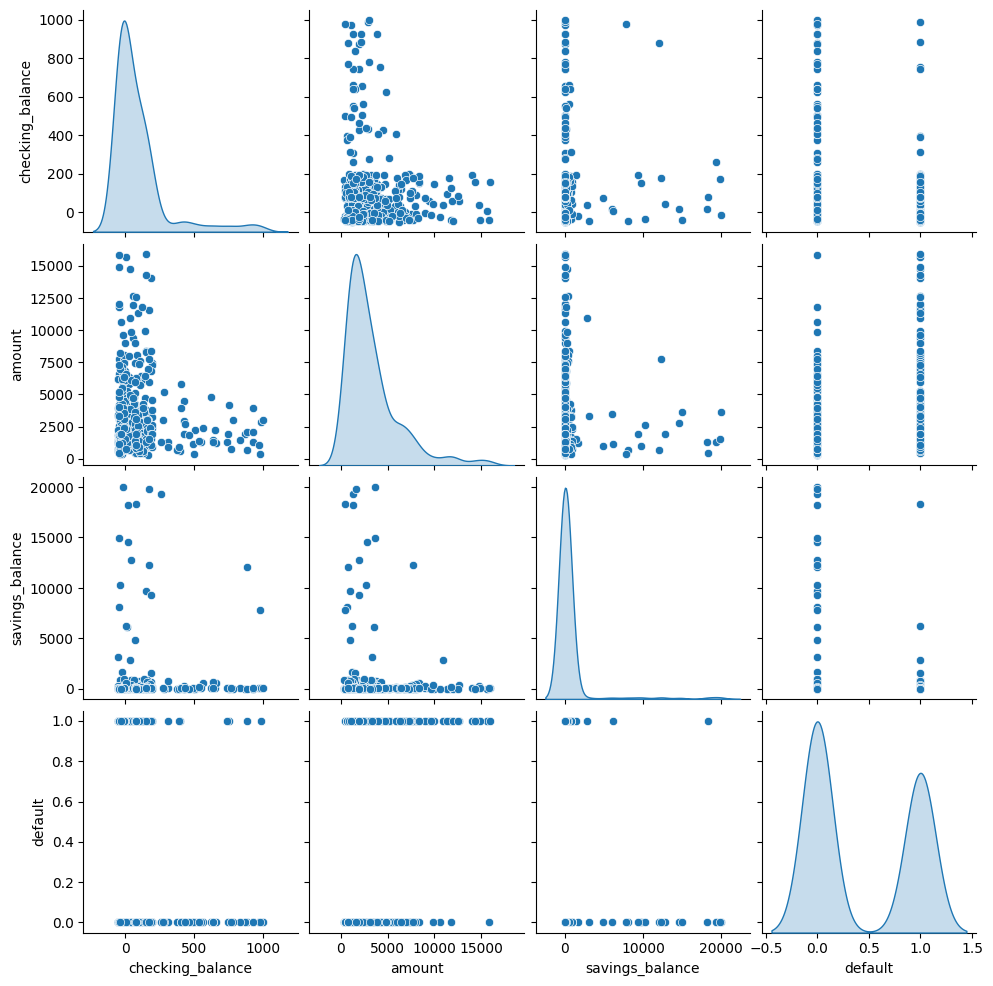

In [23]:
sns.pairplot(train_dataset[["checking_balance", "amount", "savings_balance", "default"]], diag_kind="kde")

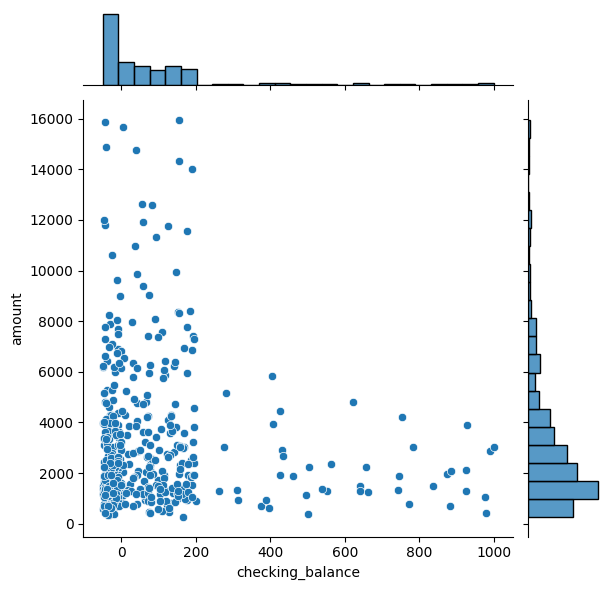

In [24]:
sns.jointplot(x=train_dataset["checking_balance"],y=train_dataset["amount"],data=train_dataset)

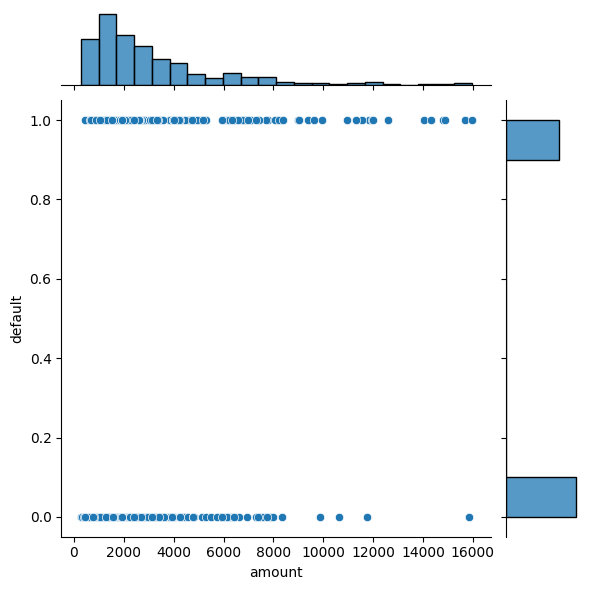

In [25]:
sns.jointplot(x=train_dataset["amount"],y=train_dataset["default"],data=train_dataset)

### Split features from labels

I now separate the target value, or "label", from the features.

In [26]:
train_labels = train_dataset.pop('default')
test_labels = test_dataset.pop('default')

**Also** at the overall statistics:

In [27]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
checking_balance,418.0,95.069378,202.999397,-50.0,-24.0,22.0,134.75,999.0
months_loan_duration,418.0,21.181818,12.358958,6.0,12.0,18.0,27.00,60.0
amount,418.0,3286.528708,2908.234195,276.0,1295.5,2356.0,4016.50,15945.0
savings_balance,418.0,666.777512,2724.228765,0.0,28.0,61.0,93.00,19970.0
employment_length,418.0,56.755981,61.213255,0.0,12.0,36.0,81.00,228.0
installment_rate,418.0,2.928230,1.120816,1.0,2.0,3.0,4.00,4.0
residence_history,418.0,84.358852,88.274047,0.0,11.0,48.0,132.00,288.0
age,418.0,35.239234,11.966588,19.0,26.0,32.0,42.00,75.0
existing_credits,418.0,1.373206,0.595305,1.0,1.0,1.0,2.00,4.0
dependents,418.0,1.143541,0.351044,1.0,1.0,1.0,1.00,2.0


In [28]:
train_dataset.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_length,installment_rate,residence_history,age,existing_credits,dependents,...,housing_own,housing_rent,foreign_worker_no,foreign_worker_yes,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male
414,162.0,12,1410,61.0,12.0,2,4.0,31,1,1,...,1,0,0,1,0,0,0,1,0,1
478,-6.0,24,6872,32.0,5.0,2,48.0,55,1,1,...,1,0,0,1,0,1,0,0,0,1
75,-10.0,36,6887,33.0,36.0,4,12.0,29,1,1,...,1,0,0,1,0,1,0,0,0,1
126,36.0,48,10961,2839.0,60.0,1,4.0,27,2,1,...,1,0,0,1,0,1,0,0,0,1
454,309.0,6,1343,93.0,216.0,1,108.0,46,2,2,...,1,0,1,0,0,1,0,0,0,1


# Normalization

Normalization is a process of transforming data into a common scale. This is done to ensure that all features are treated equally when performing machine learning algorithms. Without normalization, features with larger values would have a greater impact on the model than features with smaller values.

There are several reasons why normalization is important. First, it can help to improve the performance of machine learning algorithms. By normalizing the data, we can reduce the impact of outliers and make the model more robust to noise. Second, normalization can help to speed up the training process. By reducing the range of values, the model can be trained more quickly. Finally, normalization can help to improve the interpretability of the model. By normalizing the data, we can make it easier to understand how the model is making predictions.


In [29]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [30]:
normed_train_data.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_length,installment_rate,residence_history,age,existing_credits,dependents,...,housing_own,housing_rent,foreign_worker_no,foreign_worker_yes,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male
414,0.329708,-0.742928,-0.645247,-0.222367,-0.731149,-0.828173,-0.910334,-0.354256,-0.626915,-0.408897,...,0.682312,-0.508347,-0.205652,0.205652,-0.416822,-1.224499,-0.164202,1.854336,-0.704994,0.704994
478,-0.497880,0.228027,1.232869,-0.233012,-0.845503,-0.828173,-0.411886,1.651328,-0.626915,-0.408897,...,0.682312,-0.508347,-0.205652,0.205652,-0.416822,0.814707,-0.164202,-0.537986,-0.704994,0.704994
75,-0.517585,1.198983,1.238027,-0.232645,-0.339077,0.956241,-0.819707,-0.521388,-0.626915,-0.408897,...,0.682312,-0.508347,-0.205652,0.205652,-0.416822,0.814707,-0.164202,-0.537986,-0.704994,0.704994
126,-0.290983,2.169939,2.638877,0.797372,0.052995,-1.720381,-0.910334,-0.688520,1.052896,-0.408897,...,0.682312,-0.508347,-0.205652,0.205652,-0.416822,0.814707,-0.164202,-0.537986,-0.704994,0.704994
454,1.053849,-1.228406,-0.668285,-0.210620,2.601463,-1.720381,0.267815,0.899234,1.052896,2.439753,...,0.682312,-0.508347,4.850959,-4.850959,-0.416822,0.814707,-0.164202,-0.537986,-0.704994,0.704994


### This normalized data is what we will use to train the model.




# Building the model: Logistic Regression with Keras

A logistic regression neural network is a type of artificial neural network that is used for classification problems. It is a linear model that uses the logistic function to map the input data to the output data. The logistic function is a sigmoid function that is used to map the real-valued input data to the probability of a binary output.

Logistic regression neural networks are often used for binary classification problems, but they can also be used for multi-class classification problems. To use a logistic regression neural network for a multi-class classification problem, the output layer of the network is typically replaced with a softmax layer. The softmax layer is a type of activation function that is used to map the output of the network to a probability distribution over the possible output classes.

Logistic regression neural networks are relatively simple to train and they can achieve good performance on a variety of classification problems. However, they can be sensitive to overfitting, and they can be difficult to interpret.





### Here, I use a `Sequential` model with a single inner dense layer, the sigmoid activation function, and a unit that returns a classified value: either 0 or 1.

In [31]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'mse'])
  return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [34]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 125ms/step


array([[0.38280496],
       [0.59252685],
       [0.18245408],
       [0.9490084 ],
       [0.01564616],
       [0.24230386],
       [0.82264227],
       [0.33607113],
       [0.8409695 ],
       [0.8307609 ]], dtype=float32)

## Train the model

I now train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [35]:
EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/300
 1/11 [=>............................] - ETA: 11s - loss: 0.8807 - mae: 0.5002 - mse: 0.3165
Epoch: 0, loss:0.7543,  mae:0.4470,  mse:0.2660,  val_loss:0.7459,  val_mae:0.4334,  val_mse:0.2550,  
11/11 [==============================] - 2s 40ms/step - loss: 0.7543 - mae: 0.4470 - mse: 0.2660 - val_loss: 0.7459 - val_mae: 0.4334 - val_mse: 0.2550
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 0.7436 - mae: 0.4447 - mse: 0.2623 - val_loss: 0.7383 - val_mae: 0.4321 - val_mse: 0.2525
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 0.7345 - mae: 0.4430 - mse: 0.2593 - val_loss: 0.7307 - val_mae: 0.4307 - val_mse: 0.2500
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 0.7258 - mae: 0.4413 - mse: 0.2562 - val_loss: 0.7234 - val_mae: 0.4294 - val_mse: 0.2475
Epoch 5/300
11/11 [==============================] - 0s 8ms/step - loss: 0.7174 - mae: 0.4394 - mse: 0.2533 - val_loss: 0.7166 - val_mae: 0.4282 - val_

<br>

<br>

<br>

# Evaluate the model

Model evaluation is the process of assessing the performance of a machine learning model. It is important to evaluate models to ensure that they are working as intended and to identify any potential problems. There are a number of different types of model evaluation metrics, which can be used to assess different aspects of model performance.




First, let's visualize the model's training progress using the stats stored in the `history` object.

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,0.522389,0.352165,0.174768,0.666806,0.384030,0.219201,295
296,0.522406,0.352163,0.174797,0.666148,0.383748,0.218971,296
297,0.522404,0.352134,0.174813,0.665650,0.383643,0.218850,297
298,0.522599,0.352318,0.174901,0.667247,0.384203,0.219332,298
299,0.522440,0.352349,0.174856,0.667500,0.384123,0.219373,299


In [37]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Mean Average Error [Default]')

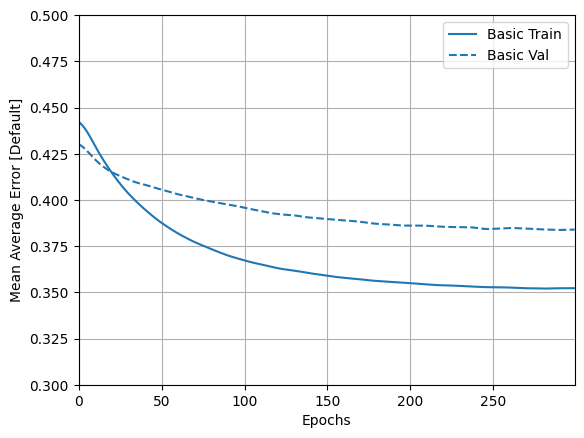

In [38]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0.3, 0.5])
plt.ylabel('Mean Average Error [Default]')

## Evaluating the model after training to get the loss statistics

In [39]:
model.evaluate(normed_test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6666 - mae: 0.4228 - mse: 0.2352


[0.6665942668914795, 0.42275187373161316, 0.23515059053897858]

Evaluation returns fairly reliable loss scores for all the error functions:

- Loss
- Mean Average Error
- Mean Squared Error

with MSE seeming the best for now.

<br>

# Run predictions on validation data

In [50]:
example_batch = normed_test_data[5:6]

example_result = model.predict(example_batch)
print(example_result)

1/1 [==============================] - 0s 64ms/step
[[0.80398434]]


In [40]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions = [0 if val < 0.5 else 1 for val in test_predictions]

4/4 [==============================] - 0s 3ms/step


#### I append the predicted labels to the initial table to compare the results.

#### Scroll to right end of table to see test_predictions.

In [48]:
final_test_data = test_dataset
final_test_data['test_labels'] = test_labels
final_test_data['test_predictions'] = test_predictions

final_test_data.head(20)

,checking_balance,months_loan_duration,amount,savings_balance,employment_length,installment_rate,residence_history,age,existing_credits,dependents,...,foreign_worker_no,foreign_worker_yes,job_mangement_self_employed,job_skilled_employee,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male,test_labels,test_predictions
9,-23.0,15,1403,86.0,36.0,2,228.0,28,1,1,...,0,1,0,1,0,0,1,0,0,0
25,646.0,10,1225,42.0,36.0,2,5.0,37,1,1,...,0,1,0,1,0,0,0,1,0,0
28,126.0,18,6204,90.0,12.0,2,168.0,44,1,2,...,0,1,0,0,0,1,0,1,0,0
31,-8.0,6,1352,879.0,36.0,1,6.0,23,1,1,...,0,1,0,0,1,0,1,0,0,0
32,39.0,27,5965,78.0,216.0,1,2.0,30,2,1,...,0,1,1,0,0,0,0,1,0,0
38,69.0,48,14421,82.0,24.0,2,0.0,25,1,1,...,0,1,0,1,0,0,0,1,1,1
42,-17.0,12,1526,7.0,192.0,4,240.0,66,2,1,...,0,1,1,0,0,0,0,1,0,0
47,-24.0,10,2315,77.0,180.0,3,156.0,52,1,1,...,0,1,0,0,0,1,0,1,0,0
48,29.0,18,1295,80.0,9.0,4,48.0,27,2,1,...,0,1,0,1,0,0,1,0,0,0
53,153.0,12,1318,1836.0,144.0,4,240.0,54,1,1,...,0,1,0,1,0,0,0,1,0,0


### It doesn't look perfect. And there are a fair number of false positives. But there is absolutely room for improvement

### Let's take a look at the error distribution.


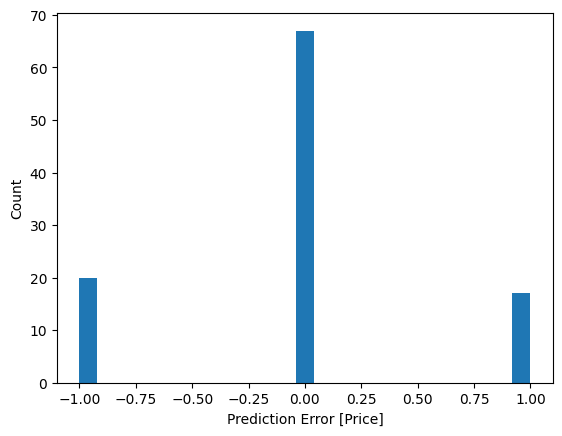

In [42]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Default]")
_ = plt.ylabel("Count")

<br>
<br>
<br>
<br>


# Deployment

### An extra step I do not miss is saving a model in TensorFlow Serving once completed

TensorFlow Serving is a tool that allows you to deploy and serve machine learning models in production. It provides a variety of features that make it easy to deploy models, including:

* A RESTful API for serving models
* Support for multiple programming languages
* A variety of serving options, including on-premise, cloud, and edge

To save a model in TensorFlow Serving, you can use the `tensorflow_serving.saved_model.save()` function. This function takes a `SavedModel` object as input and saves it to a specified location.

Once I have saved my model, I can easily deploy it using the TensorFlow Serving API.

In [43]:
import time

t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

./1687999694


In [44]:
!ls {export_path_sm}

assets	fingerprint.pb	saved_model.pb	variables


## Reloading saved models

TensorFlow Serving allows to reload saved models without having to restart the server. This can be useful for updating models with new data or for debugging models.

In [45]:
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(export_path_sm)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [51]:
example_tf_batch = tf.convert_to_tensor(example_batch, dtype='float32')
example_result = inference_func(example_tf_batch)

example_result

{'dense': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.80398434]], dtype=float32)>}

---

---

---
